# 영문 Word Cloud - 미국 독립 선언문

In [106]:
#!pip install wordcloud

In [107]:
import nltk
import pickle
from nltk.corpus import stopwords #불용어 - 분석할 때 필요없는 단어를 제거하는 영어 라이브러리
import re # 정규표현식을 사용하는 영어 라이브러리

# nltk.download('all') # 다운로드 되는 위치를 확인할 수 있음 - 필요없으면 들어가서 지우면 됨

## text를 불러서 word 분류

In [108]:
content = open('data/Independence.txt').read()

In [109]:
# 불필요한 심벌 없애기
#content = re.sub(r'[^\.\?\!\w\d\s]', '', content)
cleaned_content = re.sub('[^a-zA-Z\.]', ' ', content) # 영어, 온점만 남기고 나머지는 삭제
cleaned_content = cleaned_content.lower() # 소문자로 변환
cleaned_content = re.sub(r'\s+', ' ', cleaned_content) # 연속된 공백을 하나로 변경


In [110]:
# 문장에서 워드를 토큰으로 쪼갠다
word_tokens = nltk.word_tokenize(cleaned_content)
# print(word_tokens)

In [111]:
# 품사분리
token_pos = nltk.pos_tag(word_tokens) # 명사(NN) 위주로 분석

In [112]:
NN_words = []
for word, pos in token_pos:
    if 'NN' in pos: # NN, NNS를 모두 가져옴 (== NN 하면 안됨)
        NN_words.append(word)
print(NN_words)

['course', 'events', 'people', 'bands', 'powers', 'earth', 'station', 'laws', 'nature', 'nature', 's', 'god', 'respect', 'opinions', 'mankind', 'causes', 'separation', 'truths', 'men', 'creator', 'rights', 'life', 'liberty', 'pursuit', 'happiness', 'hand', 'text', 'phrase', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copies', 'part', 'phrase', 'today', 'rights', 'governments', 'men', 'powers', 'consent', 'form', 'government', 'becomes', 'ends', 'right', 'people', 'government', 'foundation', 'principles', 'powers', 'form', 'effect', 'safety', 'happiness', 'prudence', 'governments', 'light', 'causes', 'experience', 'mankind', 'evils', 'forms', 'train', 'abuses', 'usurpations', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guards', 'security', 'sufferance', 'colonies', 'necessity', 'systems', 'government', 'history', 'king', 'britain', 'history', 'injuries', 'usurpations', 'establishment', 'tyranny', 'states', 'let', 'world', 'assent', 'laws', 'good', '

In [113]:
# 원형으로 복원(복수형, 과거형 등을 원형으로)
wlem = nltk.WordNetLemmatizer()

lemmatized_words = []
for word in NN_words:
  new_word = wlem.lemmatize(word)
  lemmatized_words.append(new_word)

# 위의 코드와 아래의 코드는 동일
# lemmatized_words = [wlem.lemmatize(word) for word in NN_words]
# print(lemmatized_words)

print(lemmatized_words)

['course', 'event', 'people', 'band', 'power', 'earth', 'station', 'law', 'nature', 'nature', 's', 'god', 'respect', 'opinion', 'mankind', 'cause', 'separation', 'truth', 'men', 'creator', 'right', 'life', 'liberty', 'pursuit', 'happiness', 'hand', 'text', 'phrase', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copy', 'part', 'phrase', 'today', 'right', 'government', 'men', 'power', 'consent', 'form', 'government', 'becomes', 'end', 'right', 'people', 'government', 'foundation', 'principle', 'power', 'form', 'effect', 'safety', 'happiness', 'prudence', 'government', 'light', 'cause', 'experience', 'mankind', 'evil', 'form', 'train', 'abuse', 'usurpation', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guard', 'security', 'sufferance', 'colony', 'necessity', 'system', 'government', 'history', 'king', 'britain', 'history', 'injury', 'usurpation', 'establishment', 'tyranny', 'state', 'let', 'world', 'assent', 'law', 'good', 'governor', 'law', 'importance',

In [114]:
# 불용어 리스트 가져오기
stopwords_list = stopwords.words('english')
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

print(final_NN_words)

['course', 'event', 'people', 'band', 'power', 'earth', 'station', 'law', 'nature', 'nature', 'god', 'respect', 'opinion', 'mankind', 'cause', 'separation', 'truth', 'men', 'creator', 'right', 'life', 'liberty', 'pursuit', 'happiness', 'hand', 'text', 'phrase', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copy', 'part', 'phrase', 'today', 'right', 'government', 'men', 'power', 'consent', 'form', 'government', 'becomes', 'end', 'right', 'people', 'government', 'foundation', 'principle', 'power', 'form', 'effect', 'safety', 'happiness', 'prudence', 'government', 'light', 'cause', 'experience', 'mankind', 'evil', 'form', 'train', 'abuse', 'usurpation', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guard', 'security', 'sufferance', 'colony', 'necessity', 'system', 'government', 'history', 'king', 'britain', 'history', 'injury', 'usurpation', 'establishment', 'tyranny', 'state', 'let', 'world', 'assent', 'law', 'good', 'governor', 'law', 'importance', 'ope

In [115]:
# 원하는 단어 제거
customized_stopwords = ['be', 'today', 'yesterday',"it's", "don't"]
for word in customized_stopwords:
  if word in final_NN_words:
    while word in final_NN_words:
        final_NN_words.remove(word)

In [116]:
from collections import Counter

c = Counter(final_NN_words)
print(c)

Counter({'people': 10, 'law': 9, 'government': 9, 'state': 9, 'power': 8, 'right': 6, 'time': 6, 'form': 4, 'colony': 4, 'assent': 4, 'legislature': 4, 'mankind': 3, 'life': 3, 'pursuit': 3, 'happiness': 3, 'phrase': 3, 'consent': 3, 'usurpation': 3, 'world': 3, 'others': 3, 'justice': 3, 'peace': 3, 'act': 3, 'sea': 3, 'war': 3, 'nature': 2, 'cause': 2, 'separation': 2, 'men': 2, 'hand': 2, 'part': 2, 'absolute': 2, 'necessity': 2, 'system': 2, 'history': 2, 'britain': 2, 'injury': 2, 'tyrant': 2, 'body': 2, 'purpose': 2, 'invasion': 2, 'condition': 2, 'judge': 2, 'office': 2, 'army': 2, 'jurisdiction': 2, 'trial': 2, 'inhabitant': 2, 'case': 2, 'rule': 2, 'protection': 2, 'circumstance': 2, 'age': 2, 'friend': 2, 'brother': 2, 'connection': 2, 'course': 1, 'event': 1, 'band': 1, 'earth': 1, 'station': 1, 'god': 1, 'respect': 1, 'opinion': 1, 'truth': 1, 'creator': 1, 'liberty': 1, 'text': 1, 'property': 1, 'copy': 1, 'becomes': 1, 'end': 1, 'foundation': 1, 'principle': 1, 'effect': 

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

noun_text = ''
for word in final_NN_words:
  noun_text += word + ' '

noun_text

'course event people band power earth station law nature nature god respect opinion mankind cause separation truth men creator right life liberty pursuit happiness hand text phrase pursuit property pursuit happiness phrase copy part phrase right government men power consent form government becomes end right people government foundation principle power form effect safety happiness prudence government light cause experience mankind evil form train abuse usurpation object design absolute despotism duty government guard security sufferance colony necessity system government history king britain history injury usurpation establishment tyranny state let world assent law good governor law importance operation assent law accommodation district people people right representation legislature inestimable tyrant body place depository record purpose compliance measure house invasion right people time dissolution others power annihilation people exercise state time danger invasion convulsion populat

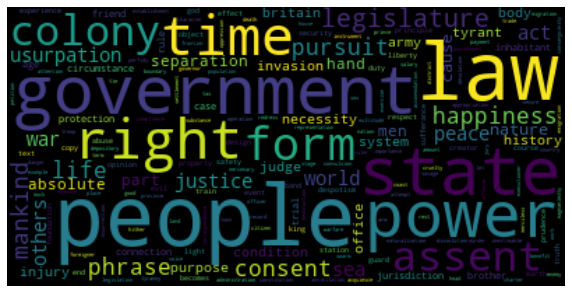

In [120]:
wordcloud = WordCloud(random_state=21, max_font_size=60, relative_scaling=0.5).generate(noun_text) # generate가 noun_text의 string value를 입력받아 count함
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

---